In [1]:
import polars as pl
import matplotlib.pyplot as plt
import numpy as np

# Analyzing Greedy Approaches

In [2]:
csv_path = "../target/csv"

## Easy Instances
FFABL_EASY = pl.read_csv(f"{csv_path}/greedy/FirstFitAreaBottomLeft_EasyResults.csv")
FFSBL_EASY = pl.read_csv(f"{csv_path}/greedy/FirstFitSideBottomLeft_EasyResults.csv")
BFABL_EASY = pl.read_csv(f"{csv_path}/greedy/BestFitAreaBottomLeft_EasyResults.csv")
BFSBL_EASY = pl.read_csv(f"{csv_path}/greedy/BestFitSideBottomLeft_EasyResults.csv")

## Medium Instances
FFABL_MED = pl.read_csv(f"{csv_path}/greedy/FirstFitAreaBottomLeft_MediumResults.csv")
FFSBL_MED = pl.read_csv(f"{csv_path}/greedy/FirstFitSideBottomLeft_MediumResults.csv")
BFABL_MED = pl.read_csv(f"{csv_path}/greedy/BestFitAreaBottomLeft_MediumResults.csv")
BFSBL_MED = pl.read_csv(f"{csv_path}/greedy/BestFitSideBottomLeft_MediumResults.csv")

## Hard Instances
FFABL_HARD = pl.read_csv(f"{csv_path}/greedy/FirstFitAreaBottomLeft_HardResults.csv")
FFSBL_HARD = pl.read_csv(f"{csv_path}/greedy/FirstFitSideBottomLeft_HardResults.csv")
BFABL_HARD = pl.read_csv(f"{csv_path}/greedy/BestFitAreaBottomLeft_HardResults.csv")
BFSBL_HARD = pl.read_csv(f"{csv_path}/greedy/BestFitSideBottomLeft_HardResults.csv")

## 1. Number of Boxes Used

Plot saved as 'box_packing_comparison_bars.png'


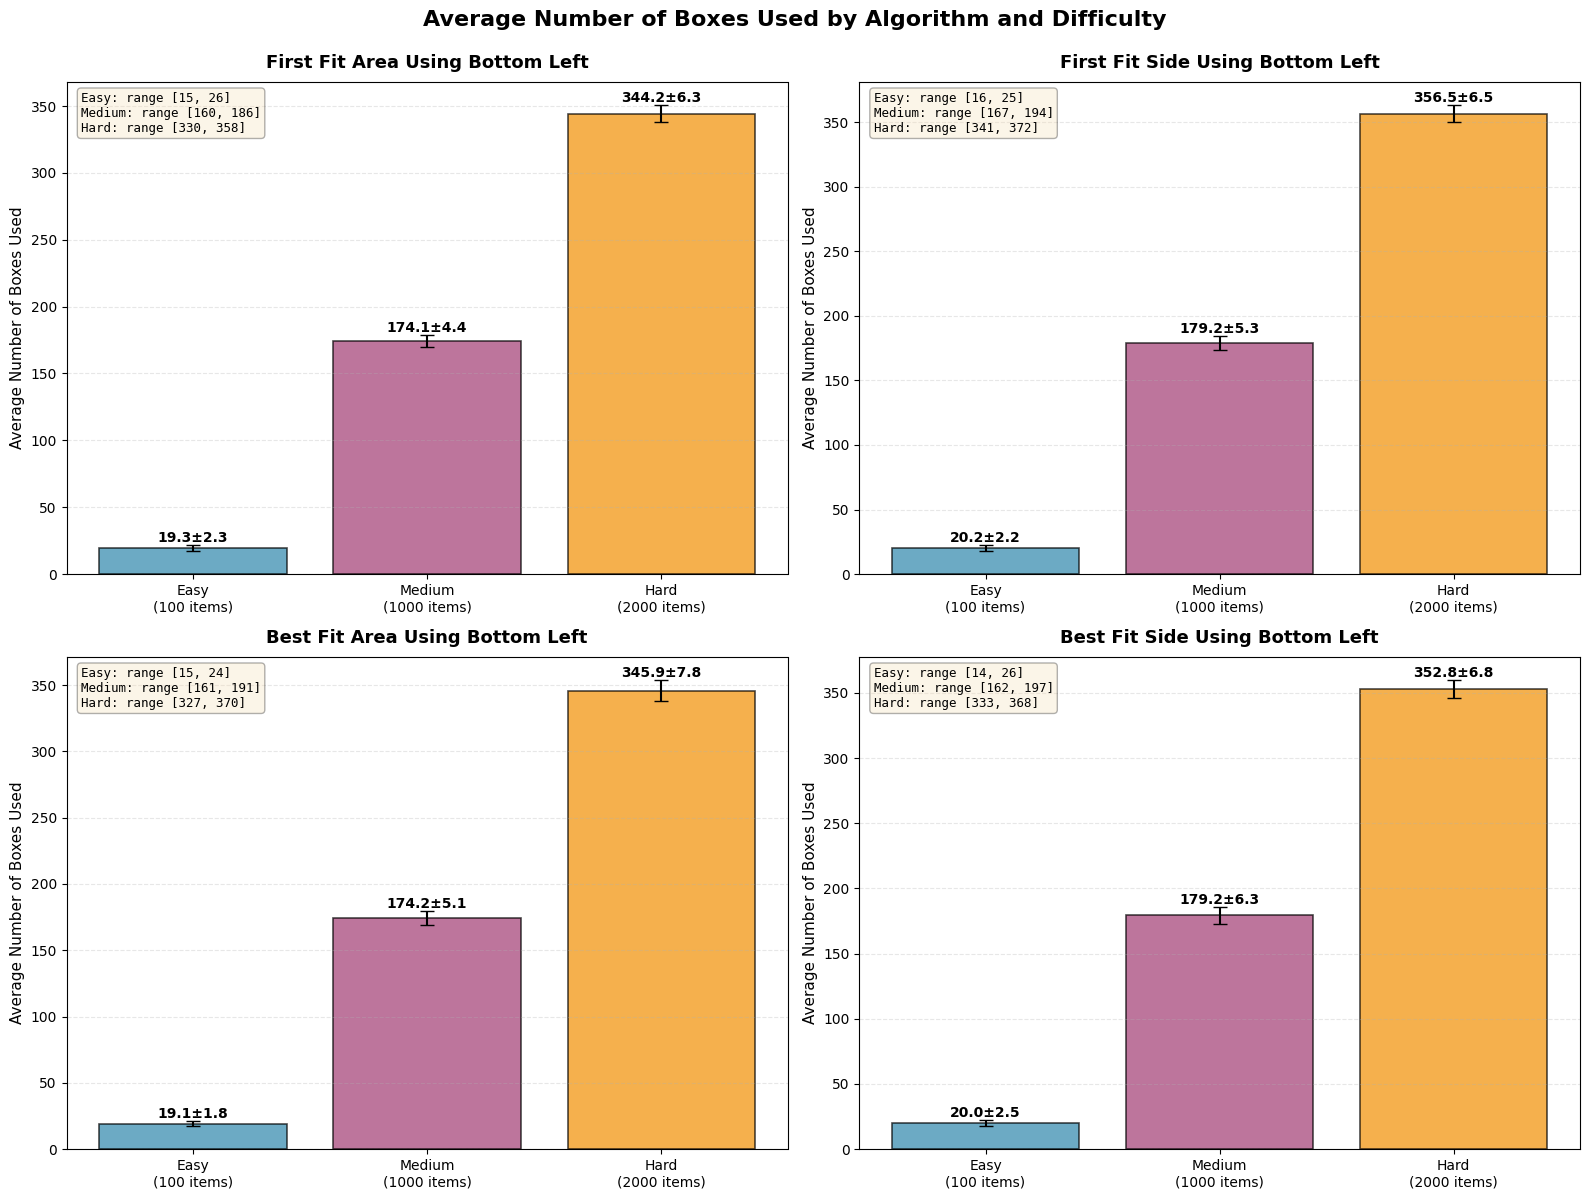

In [5]:
# Create figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Average Number of Boxes Used by Algorithm and Difficulty',
             fontsize=16, fontweight='bold', y=0.995)

# Define colors for each difficulty level
colors = {
    'Easy': '#2E86AB',
    'Medium': '#A23B72',
    'Hard': '#F18F01'
}

# Function to create bar chart
def plot_algorithm_bars(ax, easy_df, medium_df, hard_df, title):
    # Calculate means and std deviations
    easy_mean = easy_df['NumBoxes'].mean()
    medium_mean = medium_df['NumBoxes'].mean()
    hard_mean = hard_df['NumBoxes'].mean()

    easy_std = easy_df['NumBoxes'].std()
    medium_std = medium_df['NumBoxes'].std()
    hard_std = hard_df['NumBoxes'].std()

    # Data for plotting
    difficulties = ['Easy\n(100 items)', 'Medium\n(1000 items)', 'Hard\n(2000 items)']
    means = [easy_mean, medium_mean, hard_mean]
    stds = [easy_std, medium_std, hard_std]
    bar_colors = [colors['Easy'], colors['Medium'], colors['Hard']]

    # Create bar chart
    x_pos = np.arange(len(difficulties))
    bars = ax.bar(x_pos, means, yerr=stds, capsize=5, alpha=0.7,
                  color=bar_colors, edgecolor='black', linewidth=1.2)

    # Customize plot
    ax.set_facecolor('xkcd:white')
    ax.set_title(title, fontsize=13, fontweight='bold', pad=10)
    ax.set_ylabel('Average Number of Boxes Used', fontsize=11)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(difficulties)
    ax.grid(axis='y', alpha=0.3, linestyle='--')

    # Add value labels on bars
    for i, (bar, mean_val, std_val) in enumerate(zip(bars, means, stds)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + std_val,
                f'{mean_val:.1f}±{std_val:.1f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Add min/max info
    easy_min, easy_max = easy_df['NumBoxes'].min(), easy_df['NumBoxes'].max()
    medium_min, medium_max = medium_df['NumBoxes'].min(), medium_df['NumBoxes'].max()
    hard_min, hard_max = hard_df['NumBoxes'].min(), hard_df['NumBoxes'].max()

    stats_text = f'Easy: range [{easy_min}, {easy_max}]\n'
    stats_text += f'Medium: range [{medium_min}, {medium_max}]\n'
    stats_text += f'Hard: range [{hard_min}, {hard_max}]'

    props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, fontsize=9,
            verticalalignment='top', bbox=props, family='monospace')

# Plot for each algorithm
plot_algorithm_bars(axes[0, 0], FFABL_EASY, FFABL_MED, FFABL_HARD,
                    'First Fit Area Using Bottom Left')

plot_algorithm_bars(axes[0, 1], FFSBL_EASY, FFSBL_MED, FFSBL_HARD,
                    'First Fit Side Using Bottom Left')

plot_algorithm_bars(axes[1, 0], BFABL_EASY, BFABL_MED, BFABL_HARD,
                    'Best Fit Area Using Bottom Left')

plot_algorithm_bars(axes[1, 1], BFSBL_EASY, BFSBL_MED, BFSBL_HARD,
                    'Best Fit Side Using Bottom Left')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('images/BL_comparison_bars.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


Plot saved as 'box_packing_comparison_lines.png'


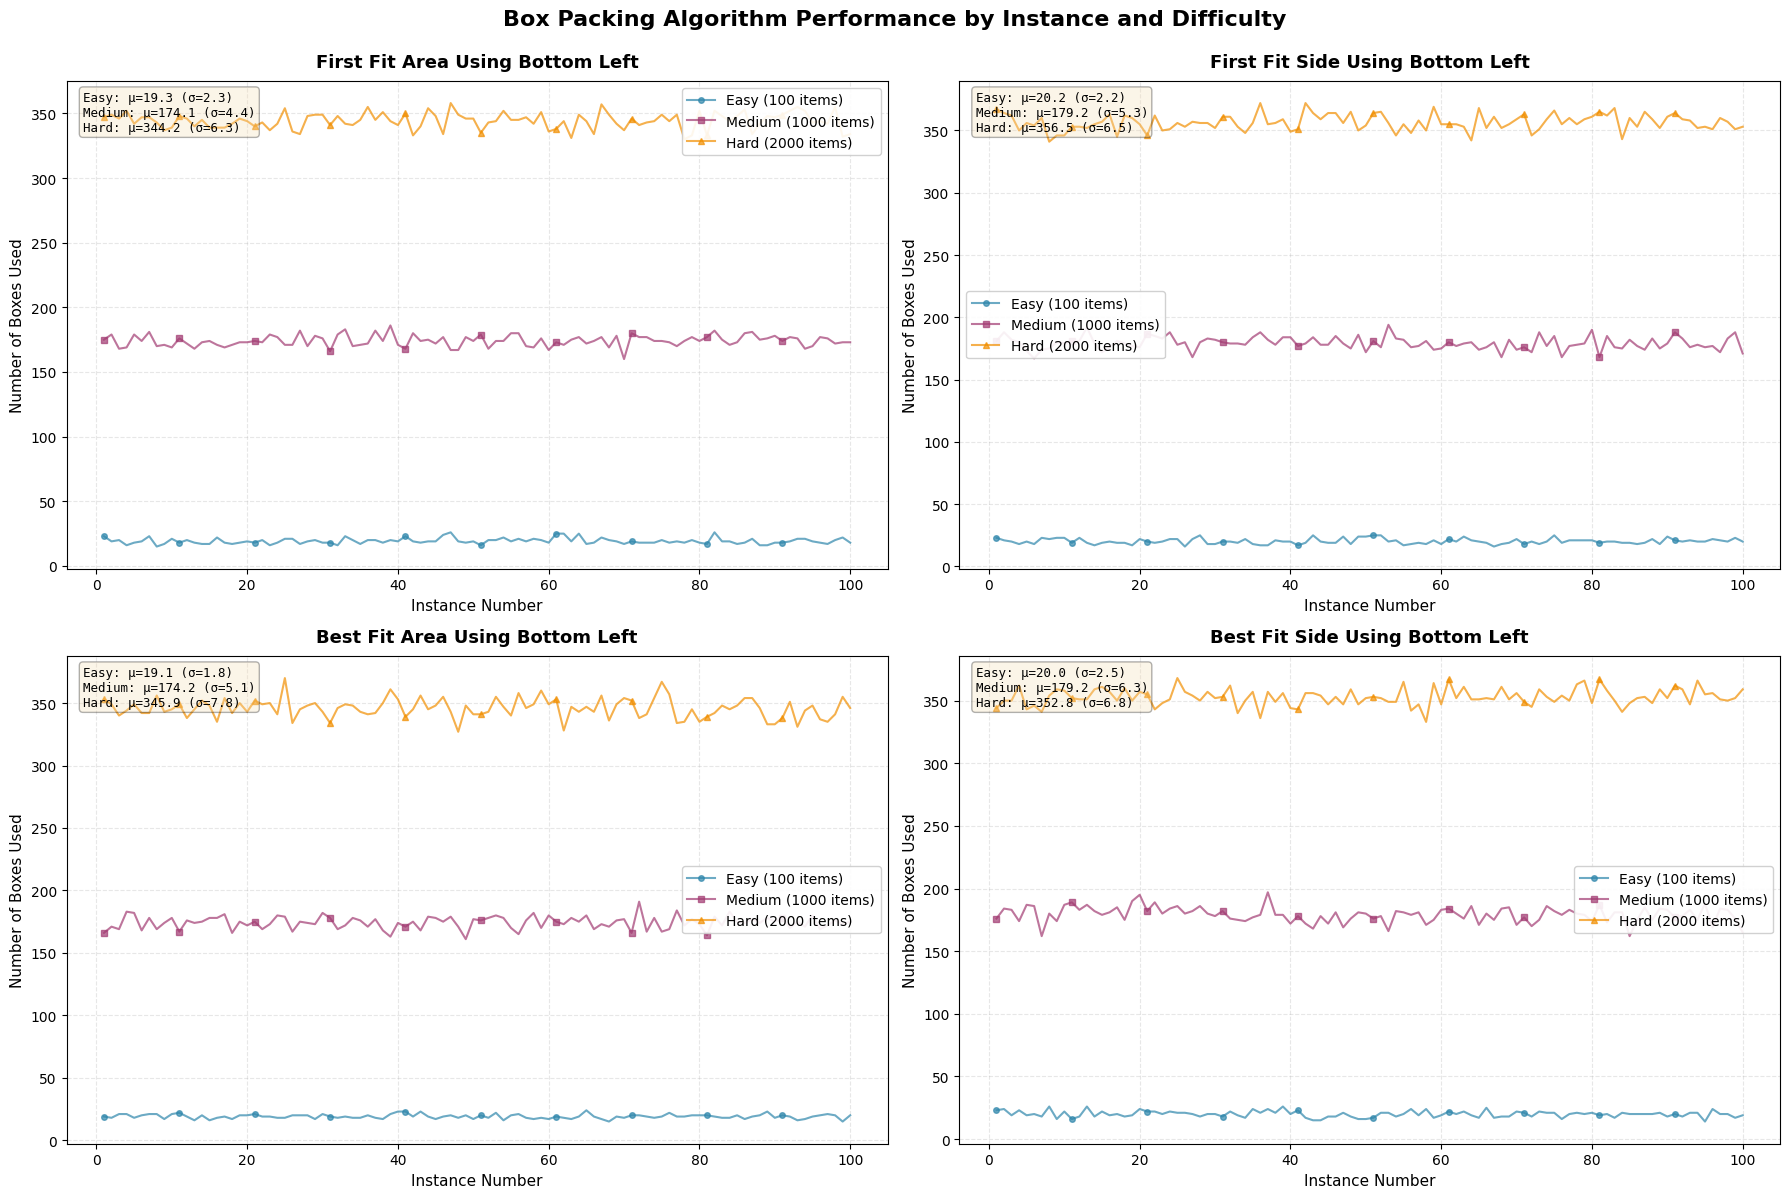

In [7]:
# Create figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Box Packing Algorithm Performance by Instance and Difficulty', 
             fontsize=16, fontweight='bold', y=0.995)

# Define colors for each difficulty level
colors = {
    'Easy': '#2E86AB',
    'Medium': '#A23B72',
    'Hard': '#F18F01'
}

# Function to plot line data for each algorithm
def plot_algorithm_lines(ax, easy_df, medium_df, hard_df, title):
    # Get NumBoxes from each difficulty level
    easy_boxes = easy_df['NumBoxes'].to_list()
    medium_boxes = medium_df['NumBoxes'].to_list()
    hard_boxes = hard_df['NumBoxes'].to_list()
    
    # Create instance numbers
    instances = range(1, 101)  # Assuming 100 instances each
    
    # Plot lines with markers every 10 instances for readability
    ax.plot(instances, easy_boxes, color=colors['Easy'], linewidth=1.5, 
            alpha=0.7, label='Easy (100 items)', marker='o', markevery=10, markersize=4)
    ax.plot(instances, medium_boxes, color=colors['Medium'], linewidth=1.5, 
            alpha=0.7, label='Medium (1000 items)', marker='s', markevery=10, markersize=4)
    ax.plot(instances, hard_boxes, color=colors['Hard'], linewidth=1.5, 
            alpha=0.7, label='Hard (2000 items)', marker='^', markevery=10, markersize=4)
    
    # Customize plot
    ax.set_title(title, fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Instance Number', fontsize=11)
    ax.set_ylabel('Number of Boxes Used', fontsize=11)
    ax.legend(loc='best', fontsize=10, framealpha=0.9)
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Add statistics
    stats_text = []
    for difficulty, boxes, color in [('Easy', easy_boxes, 'Easy'), 
                                      ('Medium', medium_boxes, 'Medium'), 
                                      ('Hard', hard_boxes, 'Hard')]:
        mean_val = np.mean(boxes)
        std_val = np.std(boxes)
        stats_text.append(f'{difficulty}: μ={mean_val:.1f} (σ={std_val:.1f})')
    
    # Add text box with statistics
    textstr = '\n'.join(stats_text)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
    ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=9,
            verticalalignment='top', bbox=props, family='monospace')

# Plot for each algorithm
plot_algorithm_lines(axes[0, 0], FFABL_EASY, FFABL_MED, FFABL_HARD,
                     'First Fit Area Using Bottom Left')

plot_algorithm_lines(axes[0, 1], FFSBL_EASY, FFSBL_MED, FFSBL_HARD,
                     'First Fit Side Using Bottom Left')

plot_algorithm_lines(axes[1, 0], BFABL_EASY, BFABL_MED, BFABL_HARD,
                     'Best Fit Area Using Bottom Left')

plot_algorithm_lines(axes[1, 1], BFSBL_EASY, BFSBL_MED, BFSBL_HARD,
                     'Best Fit Side Using Bottom Left')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('images/BL_comparison_lines.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


## 2. Runtim analysis

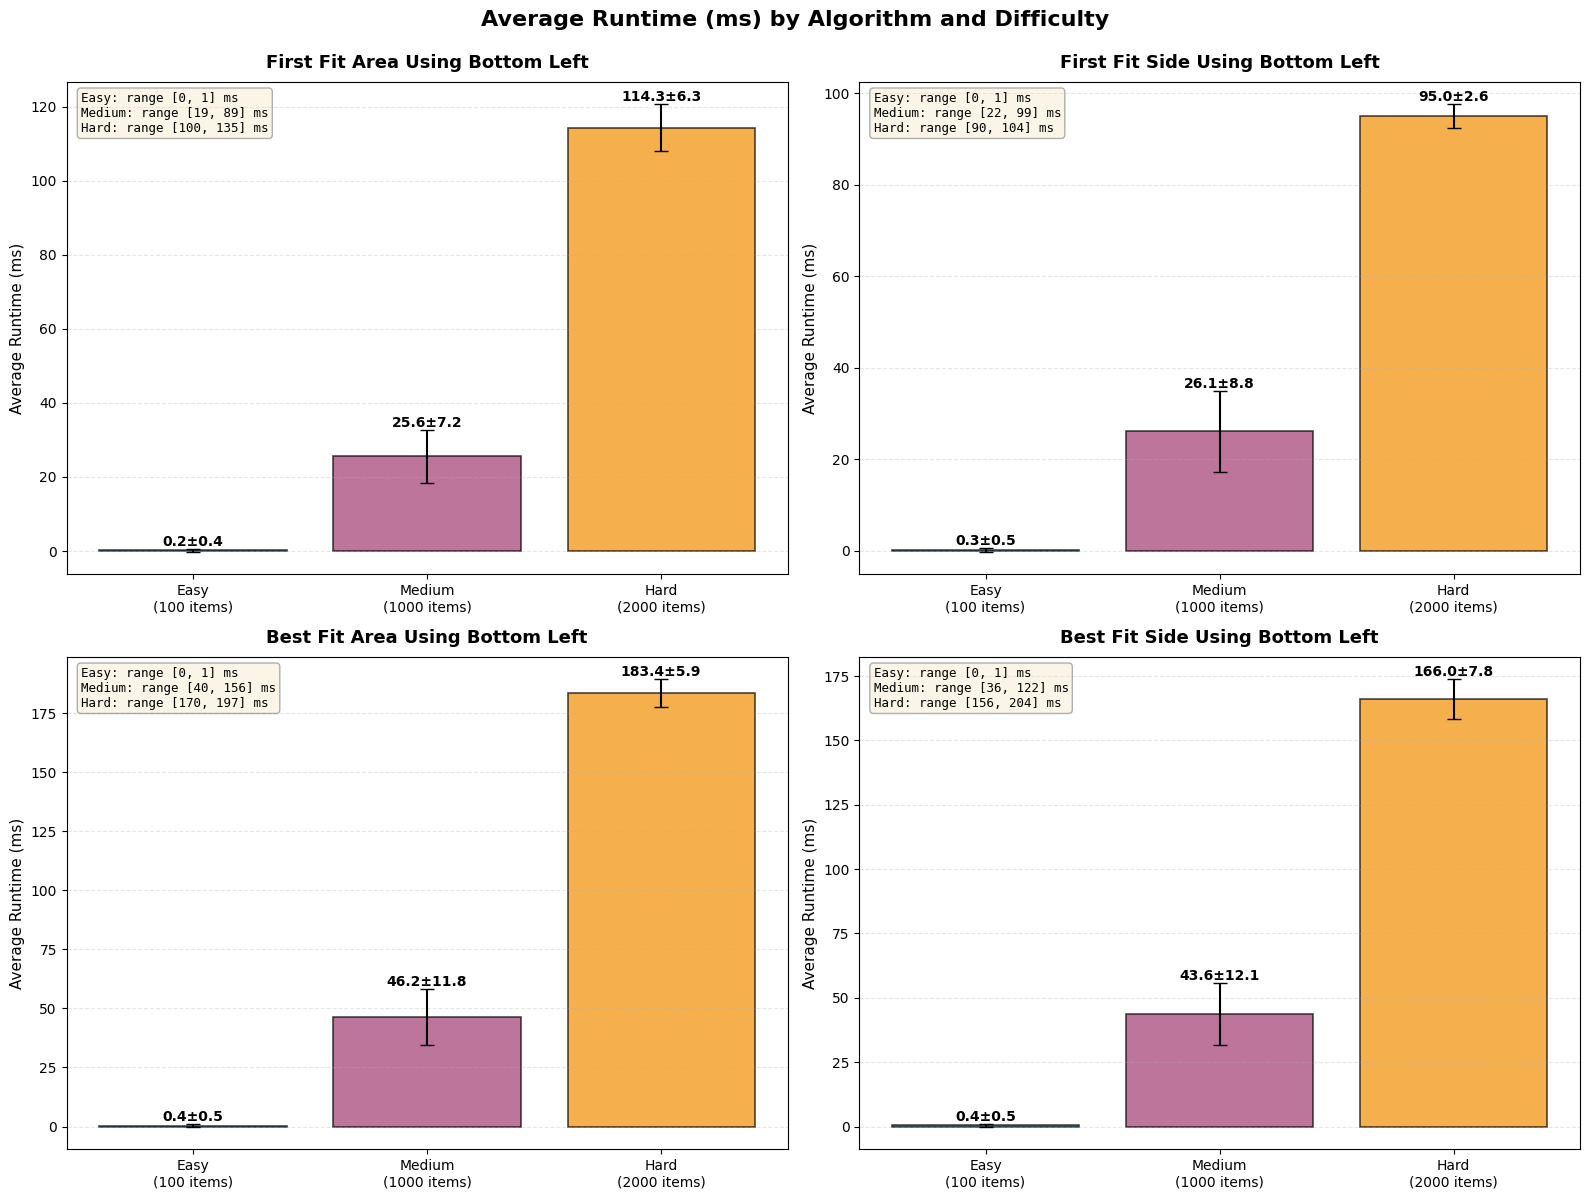

In [10]:
# Create figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Average Runtime (ms) by Algorithm and Difficulty', 
             fontsize=16, fontweight='bold', y=0.995)

# Define colors for each difficulty level
colors = {
    'Easy': '#2E86AB',
    'Medium': '#A23B72',
    'Hard': '#F18F01'
}

# Function to create bar chart for runtime
def plot_algorithm_bars(ax, easy_df, medium_df, hard_df, title):
    # Calculate means and std deviations for Duration
    easy_mean = easy_df['Duration(ms)'].mean()
    medium_mean = medium_df['Duration(ms)'].mean()
    hard_mean = hard_df['Duration(ms)'].mean()
    
    easy_std = easy_df['Duration(ms)'].std()
    medium_std = medium_df['Duration(ms)'].std()
    hard_std = hard_df['Duration(ms)'].std()
    
    # Data for plotting
    difficulties = ['Easy\n(100 items)', 'Medium\n(1000 items)', 'Hard\n(2000 items)']
    means = [easy_mean, medium_mean, hard_mean]
    stds = [easy_std, medium_std, hard_std]
    bar_colors = [colors['Easy'], colors['Medium'], colors['Hard']]
    
    # Create bar chart
    x_pos = np.arange(len(difficulties))
    bars = ax.bar(x_pos, means, yerr=stds, capsize=5, alpha=0.7, 
                   color=bar_colors, edgecolor='black', linewidth=1.2)
    
    # Customize plot
    ax.set_title(title, fontsize=13, fontweight='bold', pad=10)
    ax.set_ylabel('Average Runtime (ms)', fontsize=11)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(difficulties)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Add value labels on bars
    for i, (bar, mean_val, std_val) in enumerate(zip(bars, means, stds)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + std_val,
                f'{mean_val:.1f}±{std_val:.1f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Add min/max info
    easy_min, easy_max = easy_df['Duration(ms)'].min(), easy_df['Duration(ms)'].max()
    medium_min, medium_max = medium_df['Duration(ms)'].min(), medium_df['Duration(ms)'].max()
    hard_min, hard_max = hard_df['Duration(ms)'].min(), hard_df['Duration(ms)'].max()
    
    stats_text = f'Easy: range [{easy_min}, {easy_max}] ms\n'
    stats_text += f'Medium: range [{medium_min}, {medium_max}] ms\n'
    stats_text += f'Hard: range [{hard_min}, {hard_max}] ms'
    
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, fontsize=9,
            verticalalignment='top', bbox=props, family='monospace')

# Plot for each algorithm
plot_algorithm_bars(axes[0, 0], FFABL_EASY, FFABL_MED, FFABL_HARD,
                    'First Fit Area Using Bottom Left')

plot_algorithm_bars(axes[0, 1], FFSBL_EASY, FFSBL_MED, FFSBL_HARD,
                    'First Fit Side Using Bottom Left')

plot_algorithm_bars(axes[1, 0], BFABL_EASY, BFABL_MED, BFABL_HARD,
                    'Best Fit Area Using Bottom Left')

plot_algorithm_bars(axes[1, 1], BFSBL_EASY, BFSBL_MED, BFSBL_HARD,
                    'Best Fit Side Using Bottom Left')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('./images/BL_runtime_comparison_bars.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


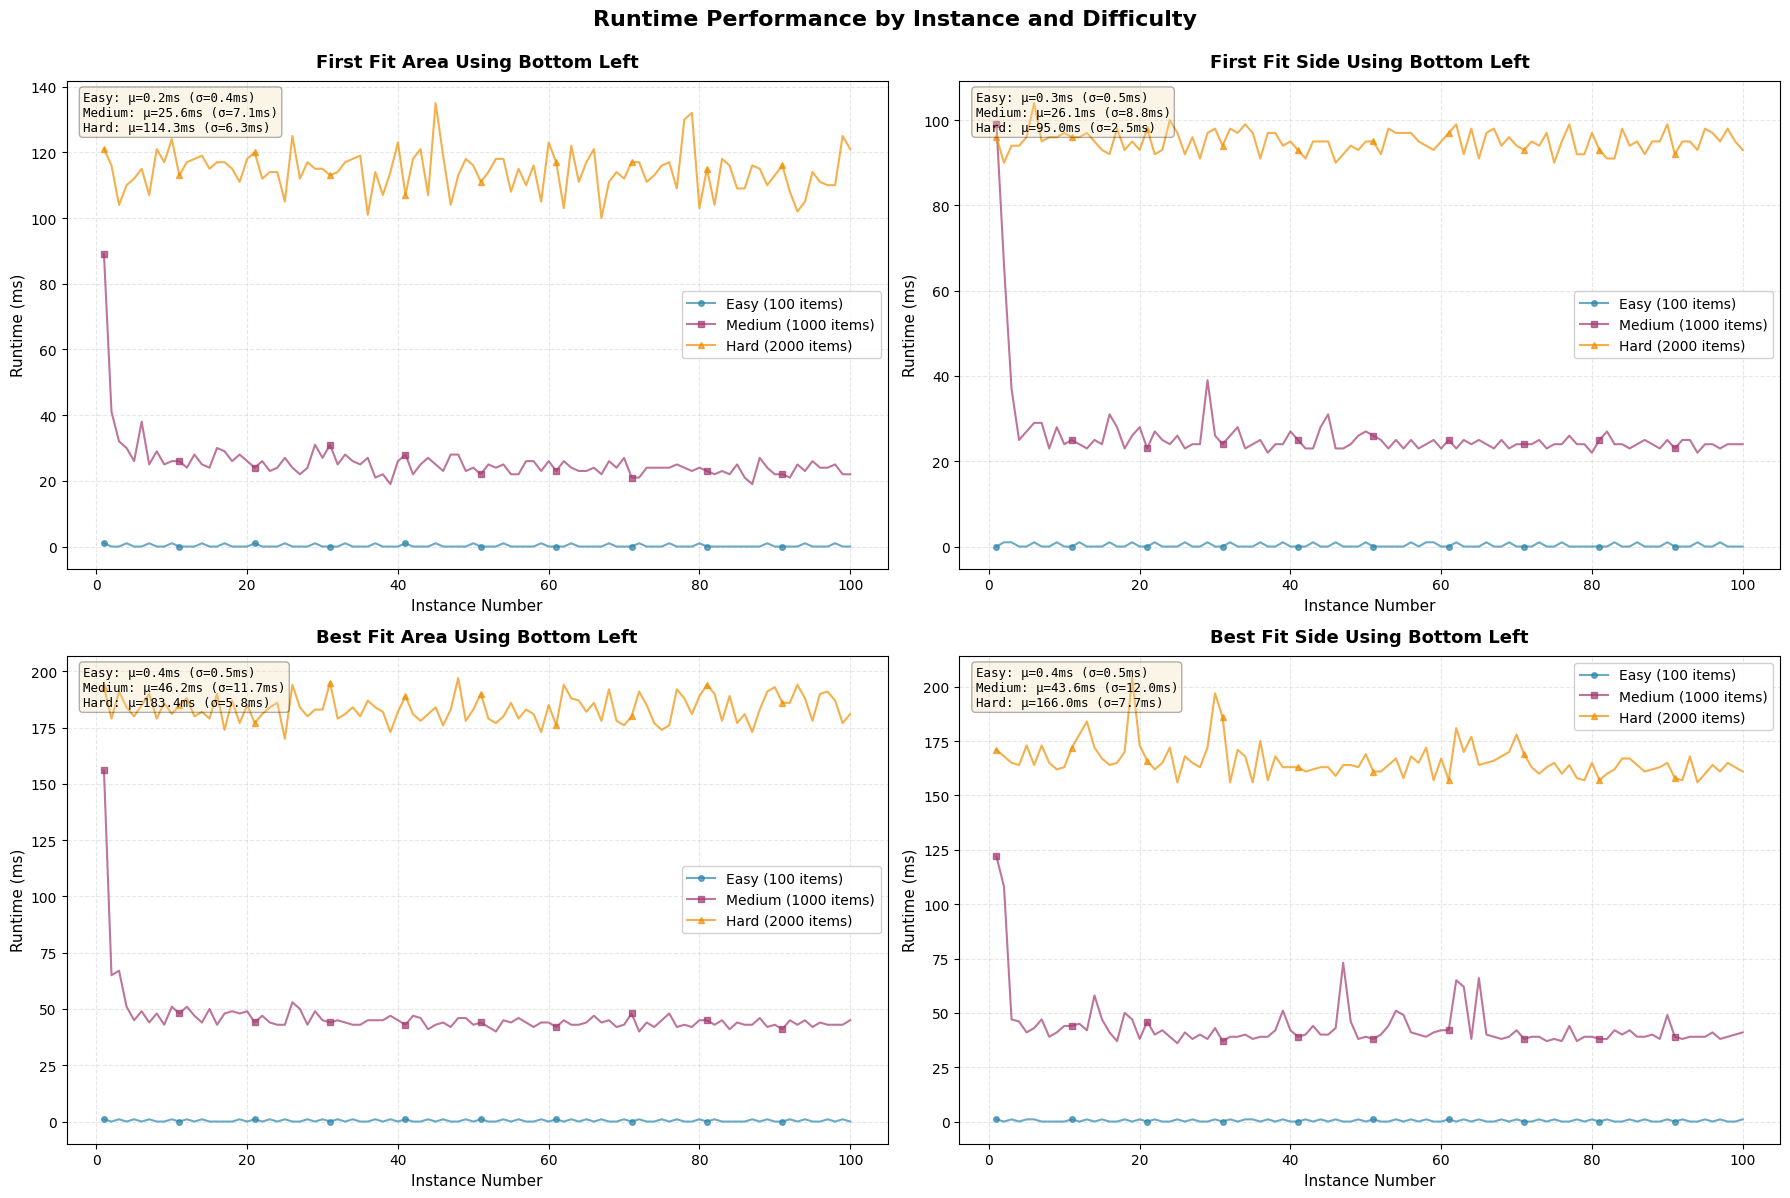

In [12]:
# Create figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Runtime Performance by Instance and Difficulty', 
             fontsize=16, fontweight='bold', y=0.995)

# Define colors for each difficulty level
colors = {
    'Easy': '#2E86AB',
    'Medium': '#A23B72',
    'Hard': '#F18F01'
}

# Function to plot line data for runtime
def plot_algorithm_lines(ax, easy_df, medium_df, hard_df, title):
    # Get Duration from each difficulty level
    easy_duration = easy_df['Duration(ms)'].to_list()
    medium_duration = medium_df['Duration(ms)'].to_list()
    hard_duration = hard_df['Duration(ms)'].to_list()
    
    # Create instance numbers
    instances = range(1, 101)  # Assuming 100 instances each
    
    # Plot lines with markers every 10 instances for readability
    ax.plot(instances, easy_duration, color=colors['Easy'], linewidth=1.5, 
            alpha=0.7, label='Easy (100 items)', marker='o', markevery=10, markersize=4)
    ax.plot(instances, medium_duration, color=colors['Medium'], linewidth=1.5, 
            alpha=0.7, label='Medium (1000 items)', marker='s', markevery=10, markersize=4)
    ax.plot(instances, hard_duration, color=colors['Hard'], linewidth=1.5, 
            alpha=0.7, label='Hard (2000 items)', marker='^', markevery=10, markersize=4)
    
    # Customize plot
    ax.set_title(title, fontsize=13, fontweight='bold', pad=10)
    ax.set_xlabel('Instance Number', fontsize=11)
    ax.set_ylabel('Runtime (ms)', fontsize=11)
    ax.legend(loc='best', fontsize=10, framealpha=0.9)
    ax.grid(True, alpha=0.3, linestyle='--')
    
    # Add statistics
    stats_text = []
    for difficulty, duration, color in [('Easy', easy_duration, 'Easy'), 
                                         ('Medium', medium_duration, 'Medium'), 
                                         ('Hard', hard_duration, 'Hard')]:
        mean_val = np.mean(duration)
        std_val = np.std(duration)
        stats_text.append(f'{difficulty}: μ={mean_val:.1f}ms (σ={std_val:.1f}ms)')
    
    # Add text box with statistics
    textstr = '\n'.join(stats_text)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
    ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=9,
            verticalalignment='top', bbox=props, family='monospace')

# Plot for each algorithm
plot_algorithm_lines(axes[0, 0], FFABL_EASY, FFABL_MED, FFABL_HARD,
                     'First Fit Area Using Bottom Left')

plot_algorithm_lines(axes[0, 1], FFSBL_EASY, FFSBL_MED, FFSBL_HARD,
                     'First Fit Side Using Bottom Left')

plot_algorithm_lines(axes[1, 0], BFABL_EASY, BFABL_MED, BFABL_HARD,
                     'Best Fit Area Using Bottom Left')

plot_algorithm_lines(axes[1, 1], BFSBL_EASY, BFSBL_MED, BFSBL_HARD,
                     'Best Fit Side Using Bottom Left')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('./images/BL_runtime_comparison_lines.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


## 3. Shelf Algorithm

In [17]:
SHELF_EASY = pl.read_csv(f"{csv_path}/greedy/Shelf_EasyResults.csv")
SHELF_MED = pl.read_csv(f"{csv_path}/greedy/Shelf_MediumResults.csv")
SHELF_HARD = pl.read_csv(f"{csv_path}/greedy/Shelf_HardResults.csv")


SHELF ALGORITHM SUMMARY STATISTICS

Number of Boxes Used:
--------------------------------------------------------------------------------
Difficulty            Mean        Std        Min        Max      Range
--------------------------------------------------------------------------------
Easy                 20.27       1.98         17         28         11
Medium              182.92       4.27        171        192         21
Hard                363.83       5.83        349        379         30

Runtime (ms):
--------------------------------------------------------------------------------
Difficulty            Mean        Std        Min        Max      Range
--------------------------------------------------------------------------------
Easy                  0.10       0.33          0          2          2
Medium                3.95       2.36          2         18         16
Hard                 14.67       1.49         13         20          7



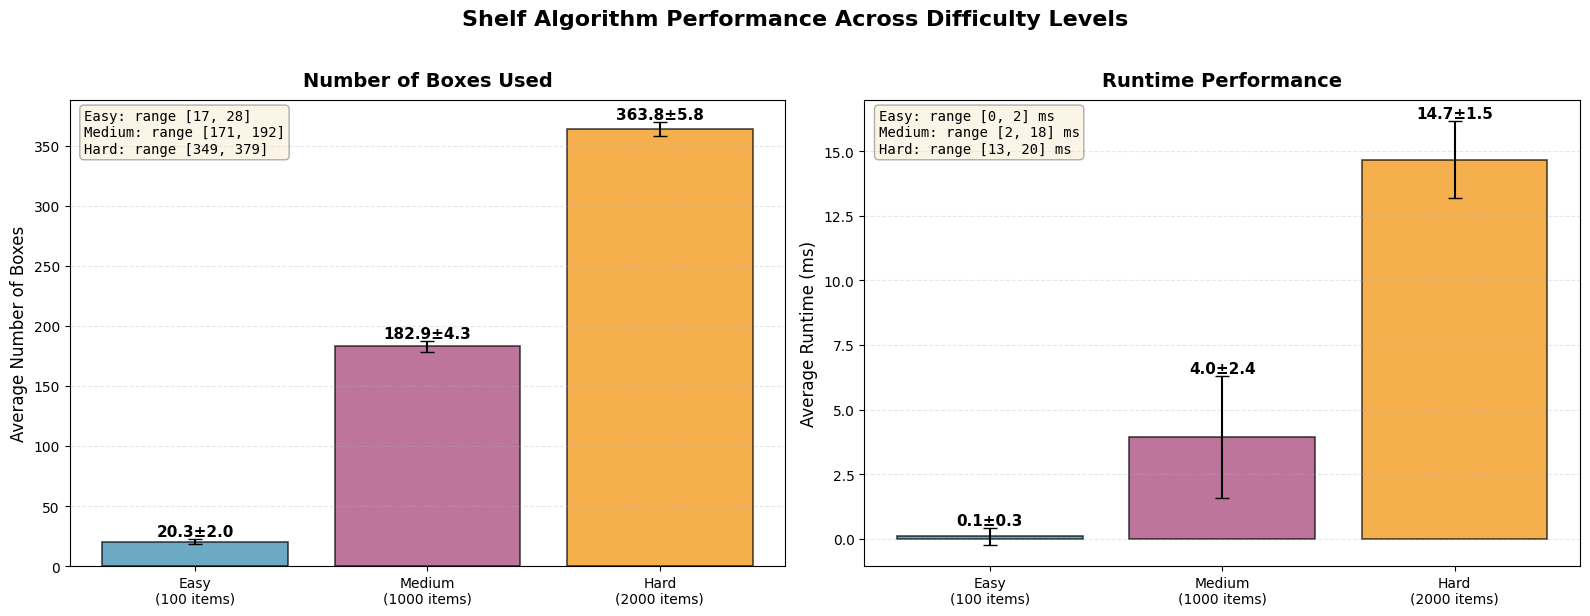

In [20]:
# Create figure with 1 row and 2 columns (boxes and runtime)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Shelf Algorithm Performance Across Difficulty Levels', 
             fontsize=16, fontweight='bold', y=1.02)

# Define colors for each difficulty level
colors = {
    'Easy': '#2E86AB',
    'Medium': '#A23B72',
    'Hard': '#F18F01'
}

# Left plot: Number of Boxes Used
ax1 = axes[0]

# Calculate statistics for boxes
easy_boxes = SHELF_EASY['NumBoxes'].to_list()
medium_boxes = SHELF_MED['NumBoxes'].to_list()
hard_boxes = SHELF_HARD['NumBoxes'].to_list()

easy_boxes_mean = np.mean(easy_boxes)
medium_boxes_mean = np.mean(medium_boxes)
hard_boxes_mean = np.mean(hard_boxes)

easy_boxes_std = np.std(easy_boxes)
medium_boxes_std = np.std(medium_boxes)
hard_boxes_std = np.std(hard_boxes)

# Data for plotting boxes
difficulties = ['Easy\n(100 items)', 'Medium\n(1000 items)', 'Hard\n(2000 items)']
boxes_means = [easy_boxes_mean, medium_boxes_mean, hard_boxes_mean]
boxes_stds = [easy_boxes_std, medium_boxes_std, hard_boxes_std]
bar_colors = [colors['Easy'], colors['Medium'], colors['Hard']]

# Create bar chart for boxes
x_pos = np.arange(len(difficulties))
bars1 = ax1.bar(x_pos, boxes_means, yerr=boxes_stds, capsize=5, alpha=0.7, 
               color=bar_colors, edgecolor='black', linewidth=1.2)

# Customize boxes plot
ax1.set_title('Number of Boxes Used', fontsize=14, fontweight='bold', pad=10)
ax1.set_ylabel('Average Number of Boxes', fontsize=12)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(difficulties)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bar, mean_val, std_val in zip(bars1, boxes_means, boxes_stds):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + std_val,
            f'{mean_val:.1f}±{std_val:.1f}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Add min/max info for boxes
easy_min, easy_max = min(easy_boxes), max(easy_boxes)
medium_min, medium_max = min(medium_boxes), max(medium_boxes)
hard_min, hard_max = min(hard_boxes), max(hard_boxes)

stats_text = f'Easy: range [{easy_min}, {easy_max}]\n'
stats_text += f'Medium: range [{medium_min}, {medium_max}]\n'
stats_text += f'Hard: range [{hard_min}, {hard_max}]'

props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
ax1.text(0.02, 0.98, stats_text, transform=ax1.transAxes, fontsize=10,
        verticalalignment='top', bbox=props, family='monospace')

# Right plot: Runtime
ax2 = axes[1]

# Calculate statistics for runtime
easy_runtime = SHELF_EASY['Duration(ms)'].to_list()
medium_runtime = SHELF_MED['Duration(ms)'].to_list()
hard_runtime = SHELF_HARD['Duration(ms)'].to_list()

easy_runtime_mean = np.mean(easy_runtime)
medium_runtime_mean = np.mean(medium_runtime)
hard_runtime_mean = np.mean(hard_runtime)

easy_runtime_std = np.std(easy_runtime)
medium_runtime_std = np.std(medium_runtime)
hard_runtime_std = np.std(hard_runtime)

# Data for plotting runtime
runtime_means = [easy_runtime_mean, medium_runtime_mean, hard_runtime_mean]
runtime_stds = [easy_runtime_std, medium_runtime_std, hard_runtime_std]

# Create bar chart for runtime
bars2 = ax2.bar(x_pos, runtime_means, yerr=runtime_stds, capsize=5, alpha=0.7, 
               color=bar_colors, edgecolor='black', linewidth=1.2)

# Customize runtime plot
ax2.set_title('Runtime Performance', fontsize=14, fontweight='bold', pad=10)
ax2.set_ylabel('Average Runtime (ms)', fontsize=12)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(difficulties)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bar, mean_val, std_val in zip(bars2, runtime_means, runtime_stds):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + std_val,
            f'{mean_val:.1f}±{std_val:.1f}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

# Add min/max info for runtime
easy_rt_min, easy_rt_max = min(easy_runtime), max(easy_runtime)
medium_rt_min, medium_rt_max = min(medium_runtime), max(medium_runtime)
hard_rt_min, hard_rt_max = min(hard_runtime), max(hard_runtime)

stats_text_rt = f'Easy: range [{easy_rt_min}, {easy_rt_max}] ms\n'
stats_text_rt += f'Medium: range [{medium_rt_min}, {medium_rt_max}] ms\n'
stats_text_rt += f'Hard: range [{hard_rt_min}, {hard_rt_max}] ms'

ax2.text(0.02, 0.98, stats_text_rt, transform=ax2.transAxes, fontsize=10,
        verticalalignment='top', bbox=props, family='monospace')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('./images/shelf_algorithm_analysis.png', dpi=300, bbox_inches='tight')

# Print summary statistics
print("\n" + "="*80)
print("SHELF ALGORITHM SUMMARY STATISTICS")
print("="*80)
print("\nNumber of Boxes Used:")
print("-" * 80)
print(f"{'Difficulty':<15} {'Mean':>10} {'Std':>10} {'Min':>10} {'Max':>10} {'Range':>10}")
print("-" * 80)
print(f"{'Easy':<15} {easy_boxes_mean:>10.2f} {easy_boxes_std:>10.2f} {easy_min:>10} {easy_max:>10} {easy_max-easy_min:>10}")
print(f"{'Medium':<15} {medium_boxes_mean:>10.2f} {medium_boxes_std:>10.2f} {medium_min:>10} {medium_max:>10} {medium_max-medium_min:>10}")
print(f"{'Hard':<15} {hard_boxes_mean:>10.2f} {hard_boxes_std:>10.2f} {hard_min:>10} {hard_max:>10} {hard_max-hard_min:>10}")

print("\nRuntime (ms):")
print("-" * 80)
print(f"{'Difficulty':<15} {'Mean':>10} {'Std':>10} {'Min':>10} {'Max':>10} {'Range':>10}")
print("-" * 80)
print(f"{'Easy':<15} {easy_runtime_mean:>10.2f} {easy_runtime_std:>10.2f} {easy_rt_min:>10} {easy_rt_max:>10} {easy_rt_max-easy_rt_min:>10}")
print(f"{'Medium':<15} {medium_runtime_mean:>10.2f} {medium_runtime_std:>10.2f} {medium_rt_min:>10} {medium_rt_max:>10} {medium_rt_max-medium_rt_min:>10}")
print(f"{'Hard':<15} {hard_runtime_mean:>10.2f} {hard_runtime_std:>10.2f} {hard_rt_min:>10} {hard_rt_max:>10} {hard_rt_max-hard_rt_min:>10}")
print()
plt.show()

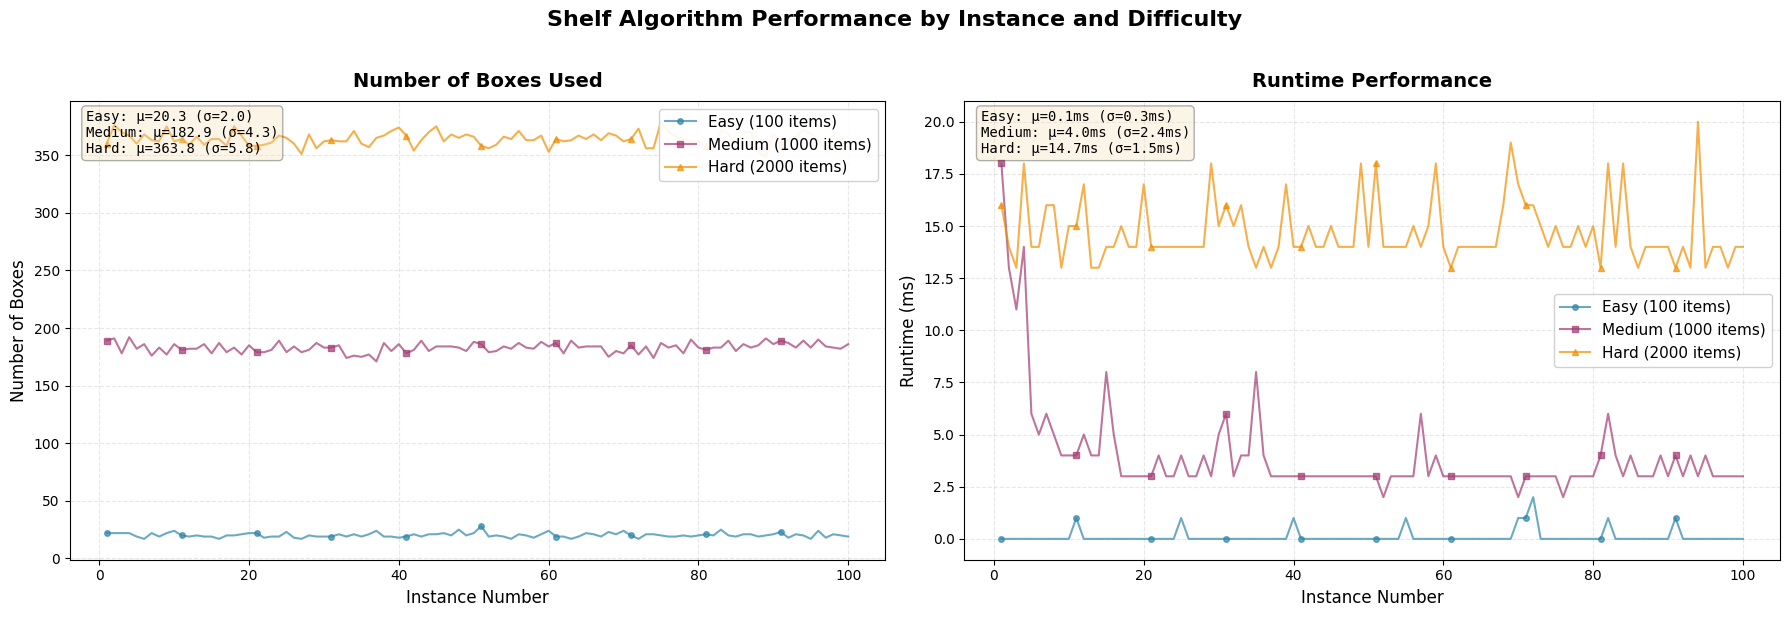

In [21]:
# Create figure with 1 row and 2 columns (boxes and runtime)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Shelf Algorithm Performance by Instance and Difficulty', 
             fontsize=16, fontweight='bold', y=1.02)

# Define colors for each difficulty level
colors = {
    'Easy': '#2E86AB',
    'Medium': '#A23B72',
    'Hard': '#F18F01'
}

# Left plot: Number of Boxes Used
ax1 = axes[0]

# Get data
easy_boxes = SHELF_EASY['NumBoxes'].to_list()
medium_boxes = SHELF_MED['NumBoxes'].to_list()
hard_boxes = SHELF_HARD['NumBoxes'].to_list()

# Create instance numbers
instances = range(1, 101)  # Assuming 100 instances each

# Plot lines with markers
ax1.plot(instances, easy_boxes, color=colors['Easy'], linewidth=1.5, 
        alpha=0.7, label='Easy (100 items)', marker='o', markevery=10, markersize=4)
ax1.plot(instances, medium_boxes, color=colors['Medium'], linewidth=1.5, 
        alpha=0.7, label='Medium (1000 items)', marker='s', markevery=10, markersize=4)
ax1.plot(instances, hard_boxes, color=colors['Hard'], linewidth=1.5, 
        alpha=0.7, label='Hard (2000 items)', marker='^', markevery=10, markersize=4)

# Customize plot
ax1.set_title('Number of Boxes Used', fontsize=14, fontweight='bold', pad=10)
ax1.set_xlabel('Instance Number', fontsize=12)
ax1.set_ylabel('Number of Boxes', fontsize=12)
ax1.legend(loc='best', fontsize=11, framealpha=0.9)
ax1.grid(True, alpha=0.3, linestyle='--')

# Add statistics
stats_text = []
for difficulty, boxes in [('Easy', easy_boxes), ('Medium', medium_boxes), ('Hard', hard_boxes)]:
    mean_val = np.mean(boxes)
    std_val = np.std(boxes)
    stats_text.append(f'{difficulty}: μ={mean_val:.1f} (σ={std_val:.1f})')

textstr = '\n'.join(stats_text)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
ax1.text(0.02, 0.98, textstr, transform=ax1.transAxes, fontsize=10,
        verticalalignment='top', bbox=props, family='monospace')

# Right plot: Runtime
ax2 = axes[1]

# Get runtime data
easy_runtime = SHELF_EASY['Duration(ms)'].to_list()
medium_runtime = SHELF_MED['Duration(ms)'].to_list()
hard_runtime = SHELF_HARD['Duration(ms)'].to_list()

# Plot lines with markers
ax2.plot(instances, easy_runtime, color=colors['Easy'], linewidth=1.5, 
        alpha=0.7, label='Easy (100 items)', marker='o', markevery=10, markersize=4)
ax2.plot(instances, medium_runtime, color=colors['Medium'], linewidth=1.5, 
        alpha=0.7, label='Medium (1000 items)', marker='s', markevery=10, markersize=4)
ax2.plot(instances, hard_runtime, color=colors['Hard'], linewidth=1.5, 
        alpha=0.7, label='Hard (2000 items)', marker='^', markevery=10, markersize=4)

# Customize plot
ax2.set_title('Runtime Performance', fontsize=14, fontweight='bold', pad=10)
ax2.set_xlabel('Instance Number', fontsize=12)
ax2.set_ylabel('Runtime (ms)', fontsize=12)
ax2.legend(loc='best', fontsize=11, framealpha=0.9)
ax2.grid(True, alpha=0.3, linestyle='--')

# Add statistics
stats_text_rt = []
for difficulty, runtime in [('Easy', easy_runtime), ('Medium', medium_runtime), ('Hard', hard_runtime)]:
    mean_val = np.mean(runtime)
    std_val = np.std(runtime)
    stats_text_rt.append(f'{difficulty}: μ={mean_val:.1f}ms (σ={std_val:.1f}ms)')

textstr_rt = '\n'.join(stats_text_rt)
ax2.text(0.02, 0.98, textstr_rt, transform=ax2.transAxes, fontsize=10,
        verticalalignment='top', bbox=props, family='monospace')

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('./images/shelf_algorithm_lines.png', dpi=300, bbox_inches='tight')
plt.show()


# Local Search Approaches Analysis

In [28]:
## Easy Instances
GEOMETRY_EASY = pl.read_csv(f"{csv_path}/localsearch/Geometry_EasyResults.csv")
PERMUTATION_EASY = pl.read_csv(f"{csv_path}/localsearch/Permutation_EasyResults.csv")
OVERLAP_EASY = pl.read_csv(f"{csv_path}/localsearch/Overlap_EasyResults.csv")

## Medium Instances
GEOMETRY_MED = pl.read_csv(f"{csv_path}/localsearch/Geometry_MediumResults.csv")
PERMUTATION_MED = pl.read_csv(f"{csv_path}/localsearch/Permutation_MediumResults.csv")
OVERLAP_MED = pl.read_csv(f"{csv_path}/localsearch/Overlap_MediumResults.csv")

## Hard Instances
GEOMETRY_HARD = pl.read_csv(f"{csv_path}/localsearch/Geometry_HardResults.csv")
PERMUTATION_HARD = pl.read_csv(f"{csv_path}/localsearch/Permutation_HardResults.csv")
OVERLAP_HARD = pl.read_csv(f"{csv_path}/localsearch/Overlap_HardResults.csv")


Saved: localsearch_individual_analysis.png
Saved: localsearch_comparative_analysis.png

LOCAL SEARCH ALGORITHMS SUMMARY

GEOMETRY
------------------------------------------------------------------------------------------
Difficulty   Metric                  Mean          Std          Min          Max
------------------------------------------------------------------------------------------
Easy         Boxes                  20.37         1.98           17           26
Easy         Runtime (ms)            0.05         0.22            0            1
Medium       Boxes                 183.63         5.49          167          196
Medium       Runtime (ms)            4.24         6.43            2           66
Hard         Boxes                 362.88         7.94          339          382
Hard         Runtime (ms)           14.58         3.15           12           41

PERMUTATION
------------------------------------------------------------------------------------------
Difficulty   Metr

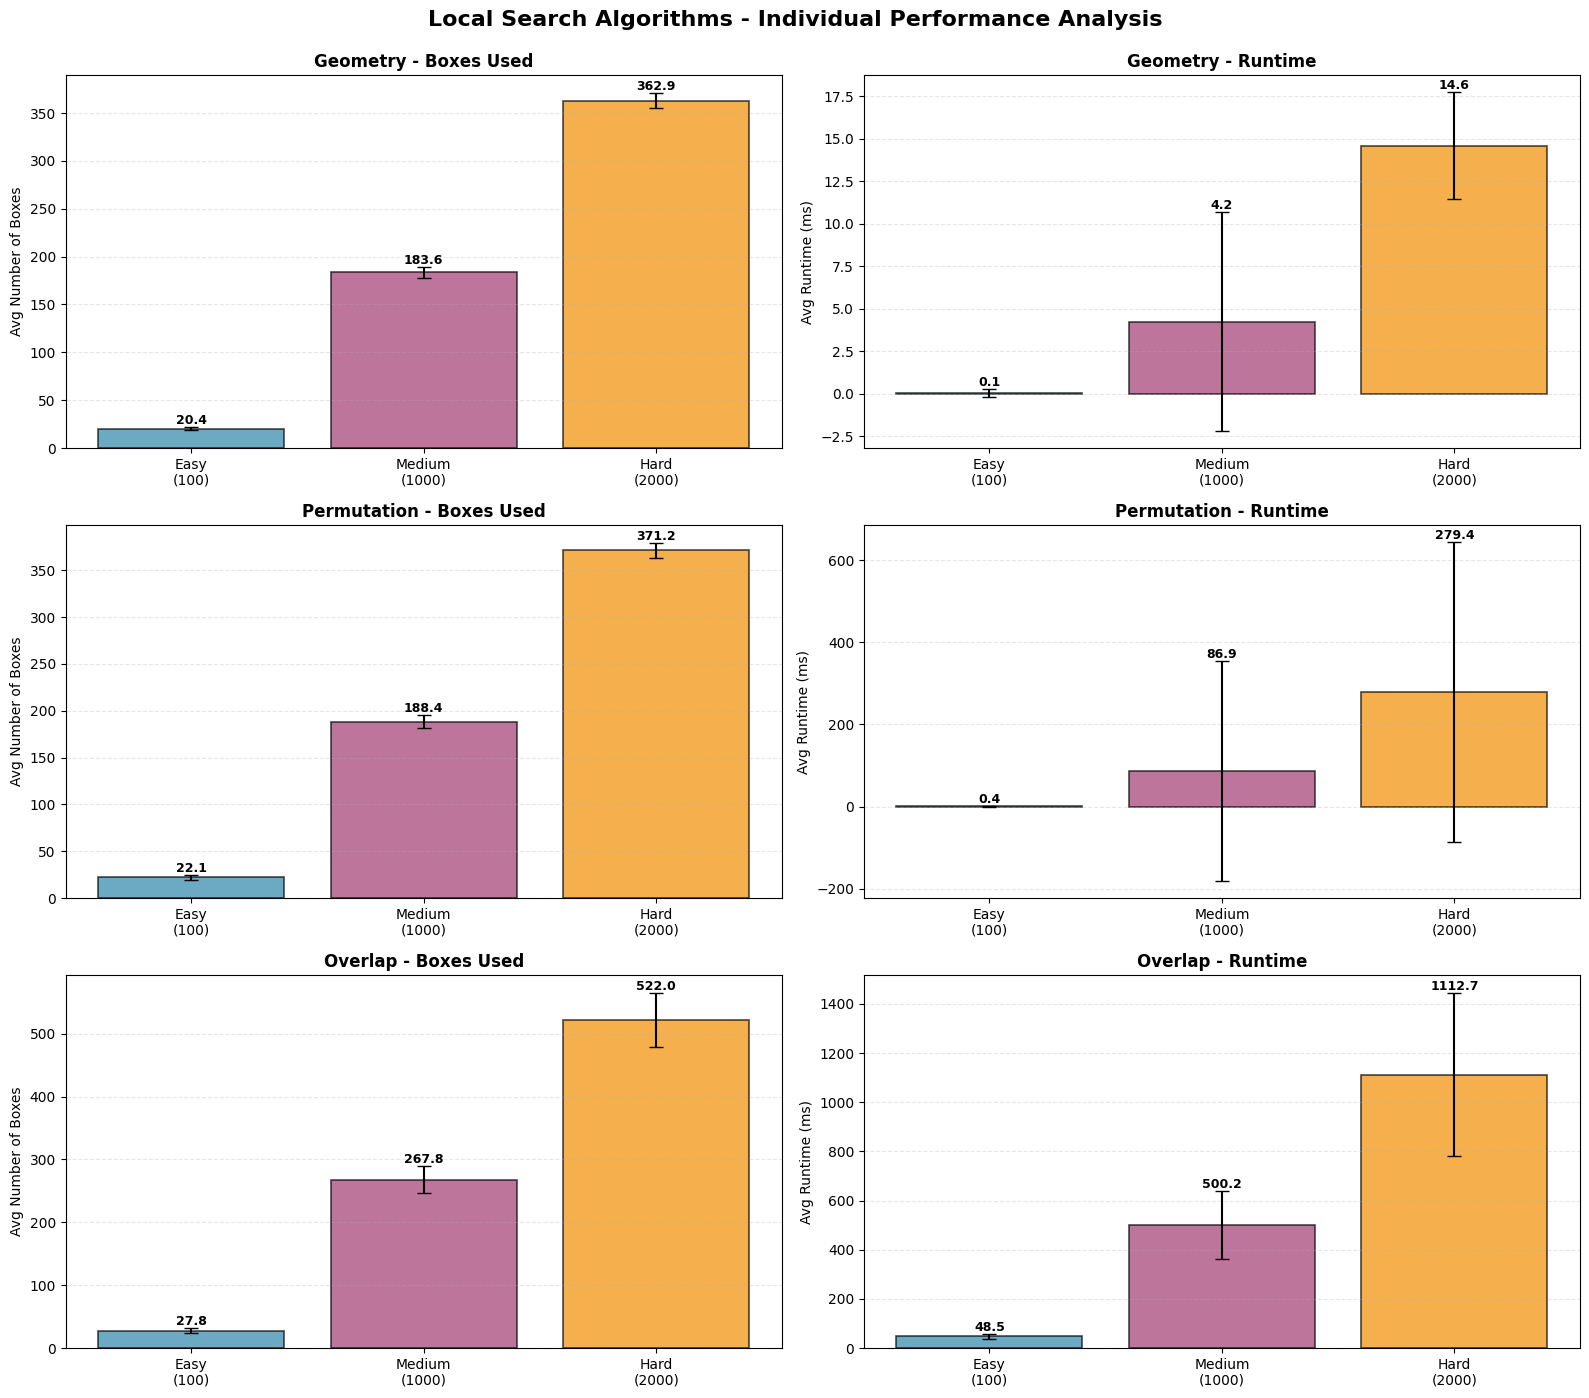

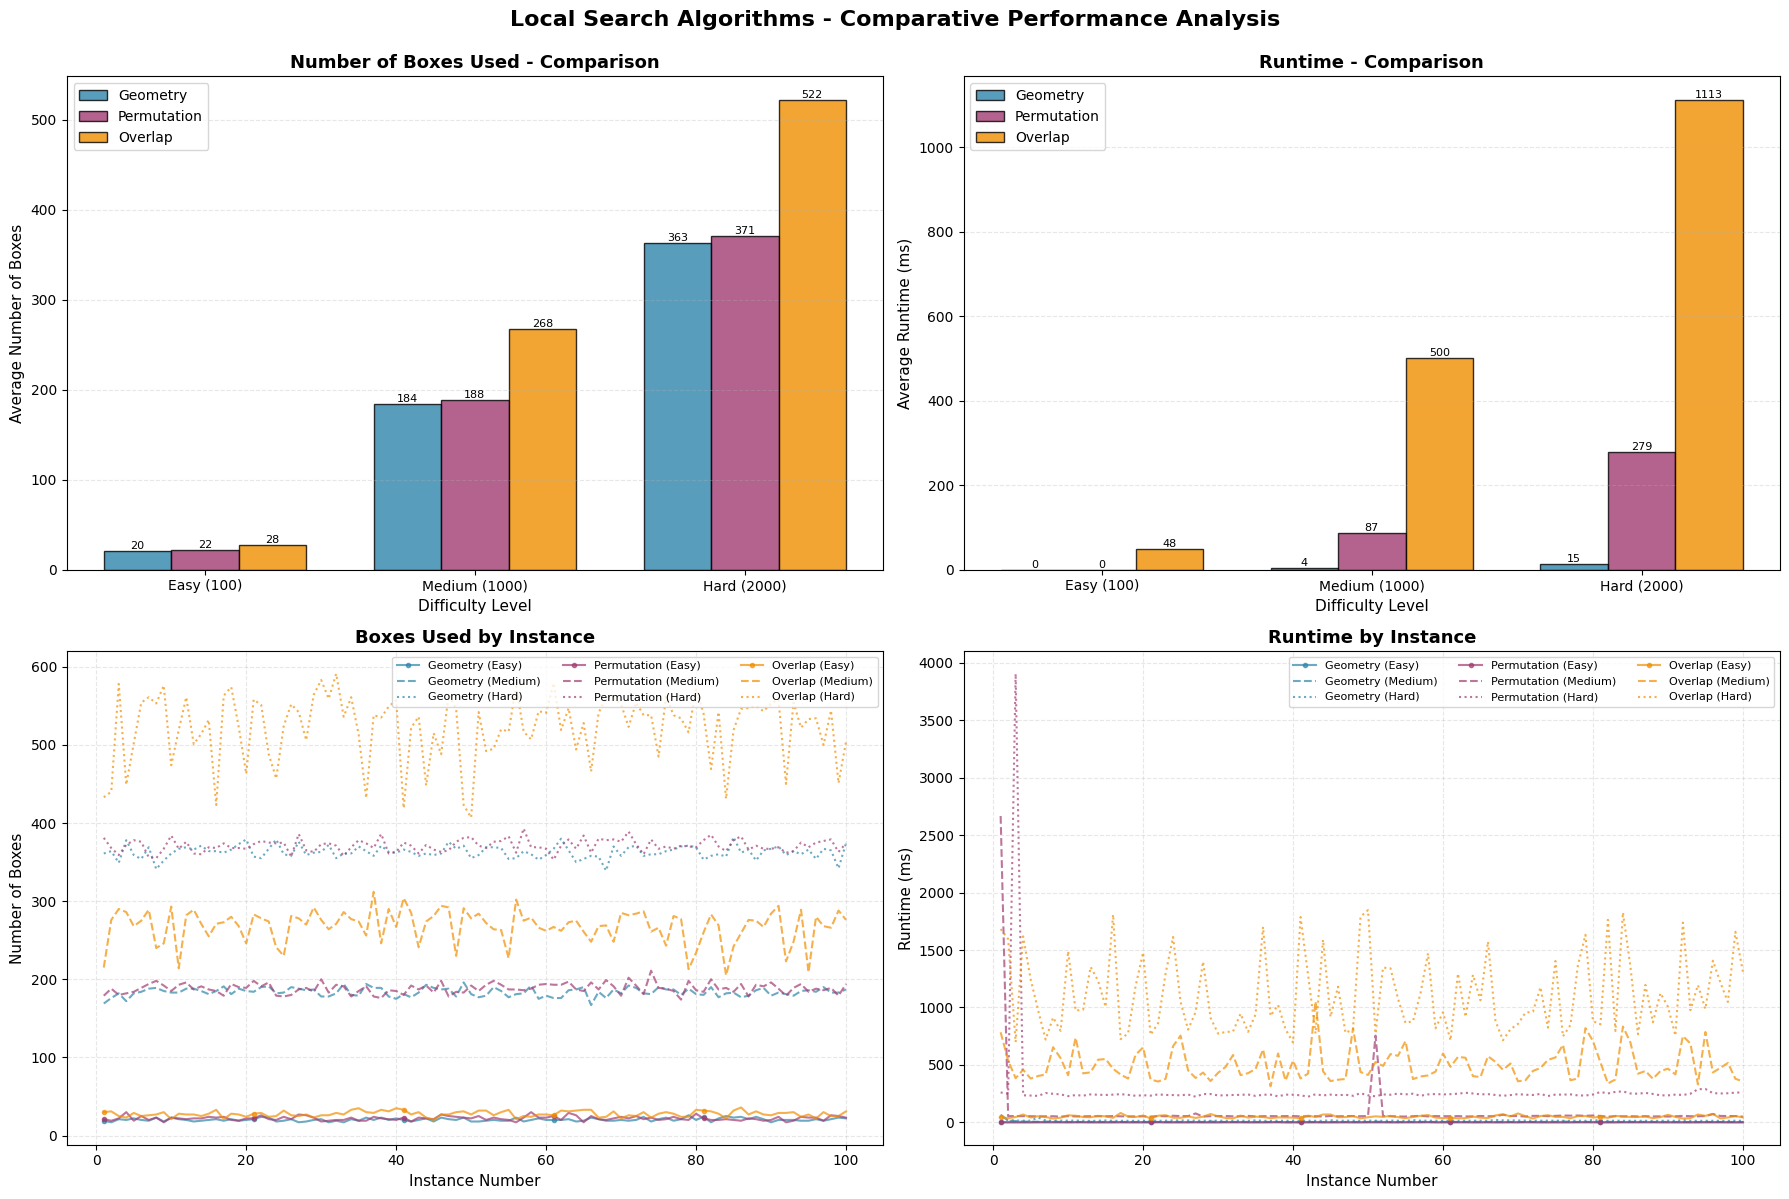

In [29]:
# ============================================================================
# FIGURE 1: Individual Algorithm Analysis (3 columns, 2 rows each)
# ============================================================================
fig1, axes1 = plt.subplots(3, 2, figsize=(16, 14))
fig1.suptitle('Local Search Algorithms - Individual Performance Analysis', 
              fontsize=16, fontweight='bold', y=0.995)

# Define colors for each difficulty level
colors = {
    'Easy': '#2E86AB',
    'Medium': '#A23B72',
    'Hard': '#F18F01'
}

def plot_individual_algorithm(axes_row, easy_df, medium_df, hard_df, algo_name):
    """Plot boxes and runtime for a single algorithm"""
    ax_boxes, ax_runtime = axes_row
    
    # === BOXES PLOT ===
    easy_boxes = easy_df['NumBoxes'].to_list()
    medium_boxes = medium_df['NumBoxes'].to_list()
    hard_boxes = hard_df['NumBoxes'].to_list()
    
    boxes_means = [np.mean(easy_boxes), np.mean(medium_boxes), np.mean(hard_boxes)]
    boxes_stds = [np.std(easy_boxes), np.std(medium_boxes), np.std(hard_boxes)]
    
    difficulties = ['Easy\n(100)', 'Medium\n(1000)', 'Hard\n(2000)']
    x_pos = np.arange(len(difficulties))
    bar_colors = [colors['Easy'], colors['Medium'], colors['Hard']]
    
    bars = ax_boxes.bar(x_pos, boxes_means, yerr=boxes_stds, capsize=5, alpha=0.7,
                        color=bar_colors, edgecolor='black', linewidth=1.2)
    
    ax_boxes.set_title(f'{algo_name} - Boxes Used', fontsize=12, fontweight='bold')
    ax_boxes.set_ylabel('Avg Number of Boxes', fontsize=10)
    ax_boxes.set_xticks(x_pos)
    ax_boxes.set_xticklabels(difficulties)
    ax_boxes.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Add value labels
    for bar, mean_val, std_val in zip(bars, boxes_means, boxes_stds):
        height = bar.get_height()
        ax_boxes.text(bar.get_x() + bar.get_width()/2., height + std_val,
                     f'{mean_val:.1f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    # === RUNTIME PLOT ===
    easy_runtime = easy_df['Duration(ms)'].to_list()
    medium_runtime = medium_df['Duration(ms)'].to_list()
    hard_runtime = hard_df['Duration(ms)'].to_list()
    
    runtime_means = [np.mean(easy_runtime), np.mean(medium_runtime), np.mean(hard_runtime)]
    runtime_stds = [np.std(easy_runtime), np.std(medium_runtime), np.std(hard_runtime)]
    
    bars_rt = ax_runtime.bar(x_pos, runtime_means, yerr=runtime_stds, capsize=5, alpha=0.7,
                             color=bar_colors, edgecolor='black', linewidth=1.2)
    
    ax_runtime.set_title(f'{algo_name} - Runtime', fontsize=12, fontweight='bold')
    ax_runtime.set_ylabel('Avg Runtime (ms)', fontsize=10)
    ax_runtime.set_xticks(x_pos)
    ax_runtime.set_xticklabels(difficulties)
    ax_runtime.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Add value labels
    for bar, mean_val, std_val in zip(bars_rt, runtime_means, runtime_stds):
        height = bar.get_height()
        ax_runtime.text(bar.get_x() + bar.get_width()/2., height + std_val,
                       f'{mean_val:.1f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Plot each algorithm
plot_individual_algorithm(axes1[0], GEOMETRY_EASY, GEOMETRY_MED, GEOMETRY_HARD, 'Geometry')
plot_individual_algorithm(axes1[1], PERMUTATION_EASY, PERMUTATION_MED, PERMUTATION_HARD, 'Permutation')
plot_individual_algorithm(axes1[2], OVERLAP_EASY, OVERLAP_MED, OVERLAP_HARD, 'Overlap')

plt.tight_layout()
plt.savefig('localsearch_individual_analysis.png', dpi=300, bbox_inches='tight')
print("Saved: localsearch_individual_analysis.png")

# ============================================================================
# FIGURE 2: Comparative Analysis (All algorithms side-by-side)
# ============================================================================
fig2, axes2 = plt.subplots(2, 2, figsize=(18, 12))
fig2.suptitle('Local Search Algorithms - Comparative Performance Analysis', 
              fontsize=16, fontweight='bold', y=0.995)

# Algorithm colors
algo_colors = {
    'Geometry': '#2E86AB',
    'Permutation': '#A23B72',
    'Overlap': '#F18F01'
}

algorithms = {
    'Geometry': {'Easy': GEOMETRY_EASY, 'Medium': GEOMETRY_MED, 'Hard': GEOMETRY_HARD},
    'Permutation': {'Easy': PERMUTATION_EASY, 'Medium': PERMUTATION_MED, 'Hard': PERMUTATION_HARD},
    'Overlap': {'Easy': OVERLAP_EASY, 'Medium': OVERLAP_MED, 'Hard': OVERLAP_HARD}
}

# === TOP LEFT: BOXES BAR CHART ===
ax_boxes_bar = axes2[0, 0]
difficulties = ['Easy', 'Medium', 'Hard']
x = np.arange(len(difficulties))
width = 0.25

for i, (algo_name, algo_data) in enumerate(algorithms.items()):
    means = []
    stds = []
    for diff in difficulties:
        boxes = algo_data[diff]['NumBoxes'].to_list()
        means.append(np.mean(boxes))
        stds.append(np.std(boxes))
    
    offset = width * (i - 1)
    bars = ax_boxes_bar.bar(x + offset, means, width, label=algo_name,
                            alpha=0.8, color=algo_colors[algo_name], 
                            edgecolor='black', linewidth=1)
    
    # Add value labels
    for bar, mean_val in zip(bars, means):
        height = bar.get_height()
        ax_boxes_bar.text(bar.get_x() + bar.get_width()/2., height,
                         f'{mean_val:.0f}', ha='center', va='bottom', fontsize=8)

ax_boxes_bar.set_title('Number of Boxes Used - Comparison', fontsize=13, fontweight='bold')
ax_boxes_bar.set_ylabel('Average Number of Boxes', fontsize=11)
ax_boxes_bar.set_xlabel('Difficulty Level', fontsize=11)
ax_boxes_bar.set_xticks(x)
ax_boxes_bar.set_xticklabels(['Easy (100)', 'Medium (1000)', 'Hard (2000)'])
ax_boxes_bar.legend(loc='best', fontsize=10)
ax_boxes_bar.grid(axis='y', alpha=0.3, linestyle='--')

# === TOP RIGHT: RUNTIME BAR CHART ===
ax_runtime_bar = axes2[0, 1]

for i, (algo_name, algo_data) in enumerate(algorithms.items()):
    means = []
    stds = []
    for diff in difficulties:
        runtime = algo_data[diff]['Duration(ms)'].to_list()
        means.append(np.mean(runtime))
        stds.append(np.std(runtime))
    
    offset = width * (i - 1)
    bars = ax_runtime_bar.bar(x + offset, means, width, label=algo_name,
                              alpha=0.8, color=algo_colors[algo_name],
                              edgecolor='black', linewidth=1)
    
    # Add value labels
    for bar, mean_val in zip(bars, means):
        height = bar.get_height()
        ax_runtime_bar.text(bar.get_x() + bar.get_width()/2., height,
                           f'{mean_val:.0f}', ha='center', va='bottom', fontsize=8)

ax_runtime_bar.set_title('Runtime - Comparison', fontsize=13, fontweight='bold')
ax_runtime_bar.set_ylabel('Average Runtime (ms)', fontsize=11)
ax_runtime_bar.set_xlabel('Difficulty Level', fontsize=11)
ax_runtime_bar.set_xticks(x)
ax_runtime_bar.set_xticklabels(['Easy (100)', 'Medium (1000)', 'Hard (2000)'])
ax_runtime_bar.legend(loc='best', fontsize=10)
ax_runtime_bar.grid(axis='y', alpha=0.3, linestyle='--')

# === BOTTOM LEFT: BOXES LINE CHART ===
ax_boxes_line = axes2[1, 0]
instances = range(1, 101)

for algo_name, algo_data in algorithms.items():
    for diff, style in [('Easy', '-'), ('Medium', '--'), ('Hard', ':')]:
        boxes = algo_data[diff]['NumBoxes'].to_list()
        label = f'{algo_name} ({diff})'
        ax_boxes_line.plot(instances, boxes, label=label, 
                          color=algo_colors[algo_name], linestyle=style,
                          linewidth=1.5, alpha=0.7, marker='o' if diff == 'Easy' else None,
                          markevery=20, markersize=3)

ax_boxes_line.set_title('Boxes Used by Instance', fontsize=13, fontweight='bold')
ax_boxes_line.set_xlabel('Instance Number', fontsize=11)
ax_boxes_line.set_ylabel('Number of Boxes', fontsize=11)
ax_boxes_line.legend(loc='best', fontsize=8, ncol=3)
ax_boxes_line.grid(True, alpha=0.3, linestyle='--')

# === BOTTOM RIGHT: RUNTIME LINE CHART ===
ax_runtime_line = axes2[1, 1]

for algo_name, algo_data in algorithms.items():
    for diff, style in [('Easy', '-'), ('Medium', '--'), ('Hard', ':')]:
        runtime = algo_data[diff]['Duration(ms)'].to_list()
        label = f'{algo_name} ({diff})'
        ax_runtime_line.plot(instances, runtime, label=label,
                            color=algo_colors[algo_name], linestyle=style,
                            linewidth=1.5, alpha=0.7, marker='o' if diff == 'Easy' else None,
                            markevery=20, markersize=3)

ax_runtime_line.set_title('Runtime by Instance', fontsize=13, fontweight='bold')
ax_runtime_line.set_xlabel('Instance Number', fontsize=11)
ax_runtime_line.set_ylabel('Runtime (ms)', fontsize=11)
ax_runtime_line.legend(loc='best', fontsize=8, ncol=3)
ax_runtime_line.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('localsearch_comparative_analysis.png', dpi=300, bbox_inches='tight')
print("Saved: localsearch_comparative_analysis.png")

# Print summary statistics
print("\n" + "="*90)
print("LOCAL SEARCH ALGORITHMS SUMMARY")
print("="*90)
for algo_name, algo_data in algorithms.items():
    print(f"\n{algo_name.upper()}")
    print("-" * 90)
    print(f"{'Difficulty':<12} {'Metric':<15} {'Mean':>12} {'Std':>12} {'Min':>12} {'Max':>12}")
    print("-" * 90)
    
    for diff in difficulties:
        boxes = algo_data[diff]['NumBoxes'].to_list()
        runtime = algo_data[diff]['Duration(ms)'].to_list()
        
        print(f"{diff:<12} {'Boxes':<15} {np.mean(boxes):>12.2f} {np.std(boxes):>12.2f} "
              f"{min(boxes):>12} {max(boxes):>12}")
        print(f"{diff:<12} {'Runtime (ms)':<15} {np.mean(runtime):>12.2f} {np.std(runtime):>12.2f} "
              f"{min(runtime):>12} {max(runtime):>12}")

plt.show()
